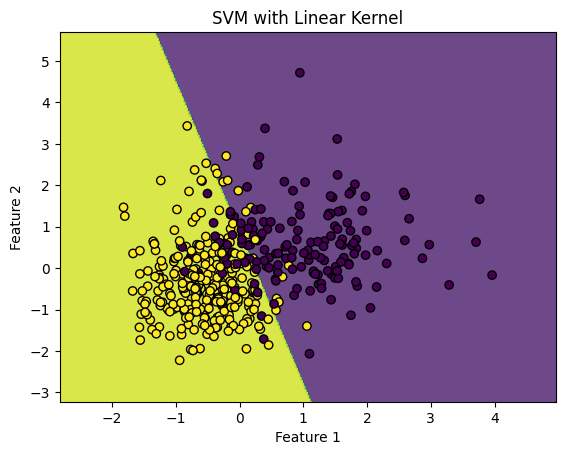

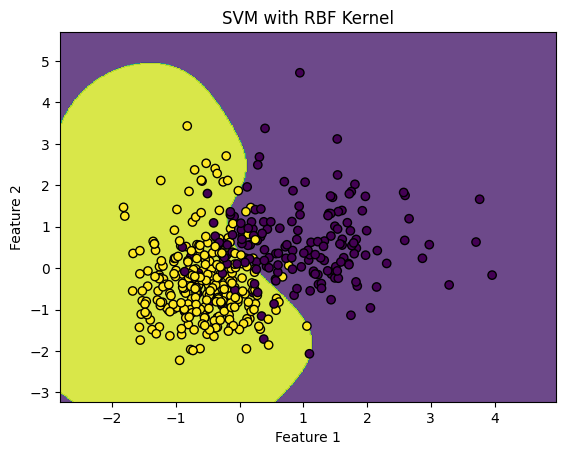

Linear Kernel Accuracy (CV): 0.8805154479118149
RBF Kernel Accuracy (CV): 0.8804378202142523


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


data = datasets.load_breast_cancer()
X = data.data
y = data.target


X = X[:, :2] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


linear_model = SVC(kernel='linear', C=1)
linear_model.fit(X_train, y_train)


rbf_model = SVC(kernel='rbf', C=1, gamma=0.5)
rbf_model.fit(X_train, y_train)


def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()


plot_decision_boundary(linear_model, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(rbf_model, X_train, y_train, "SVM with RBF Kernel")


linear_scores = cross_val_score(linear_model, X, y, cv=5)
rbf_scores = cross_val_score(rbf_model, X, y, cv=5)

print("Linear Kernel Accuracy (CV):", linear_scores.mean())
print("RBF Kernel Accuracy (CV):", rbf_scores.mean())
